In [17]:
import os
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
from torch.utils.data import DataLoader


class PrintedDigitsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        for font_folder in os.listdir(root_dir):
            font_path = os.path.join(root_dir, font_folder)
            if os.path.isdir(font_path):
                for label in os.listdir(font_path):
                    label_path = os.path.join(font_path, label)
                    if os.path.isdir(label_path):
                        for image_file in os.listdir(label_path):
                            image_path = os.path.join(label_path, image_file)
                            self.samples.append((image_path, int(label)))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        image_path, label = self.samples[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

data_path = "./printed_digits"
train_dataset = PrintedDigitsDataset(root_dir=data_path, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# print(f"Total samples: {len(train_dataset)}")


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DigitClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super(DigitClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [19]:
import torch.optim as optim

model = DigitClassifier(num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, optimizer, criterion, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")

train_model(model, train_loader, optimizer, criterion, epochs=50)


Epoch 1/50, Loss: 9.5761, Accuracy: 2.00%
Epoch 2/50, Loss: 9.0268, Accuracy: 18.00%
Epoch 3/50, Loss: 8.9217, Accuracy: 18.00%
Epoch 4/50, Loss: 8.5319, Accuracy: 26.00%
Epoch 5/50, Loss: 8.1566, Accuracy: 38.00%
Epoch 6/50, Loss: 7.6202, Accuracy: 36.00%
Epoch 7/50, Loss: 6.4065, Accuracy: 54.00%
Epoch 8/50, Loss: 5.3001, Accuracy: 56.00%
Epoch 9/50, Loss: 4.9933, Accuracy: 60.00%
Epoch 10/50, Loss: 3.8630, Accuracy: 82.00%
Epoch 11/50, Loss: 2.8152, Accuracy: 86.00%
Epoch 12/50, Loss: 2.2652, Accuracy: 88.00%
Epoch 13/50, Loss: 2.3026, Accuracy: 90.00%
Epoch 14/50, Loss: 1.0714, Accuracy: 98.00%
Epoch 15/50, Loss: 1.0321, Accuracy: 94.00%
Epoch 16/50, Loss: 0.6618, Accuracy: 94.00%
Epoch 17/50, Loss: 0.4143, Accuracy: 96.00%
Epoch 18/50, Loss: 0.3703, Accuracy: 100.00%
Epoch 19/50, Loss: 0.2565, Accuracy: 100.00%
Epoch 20/50, Loss: 0.1602, Accuracy: 100.00%
Epoch 21/50, Loss: 0.1376, Accuracy: 100.00%
Epoch 22/50, Loss: 0.1393, Accuracy: 100.00%
Epoch 23/50, Loss: 0.0880, Accuracy: 

In [20]:
torch.save(model.state_dict(), "digit_classifier.pth")
print("Model saved!")


Model saved!


In [21]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")


In [ ]:
'''
hand_write_beauty_before/
├── 0/
│   ├── 0_1.png
│   ├── 0_2.png
│   └── ...
├── 1/
│   ├── 1_1.png
│   ├── 1_2.png
│   └── ...
└── ...
'''

'''
hand_write_beauty_after/
├── 0/
│   ├── 0_1.png
│   ├── 0_2.png
│   └── ...
├── 1/
│   ├── 1_1.png
│   ├── 1_2.png
│   └── ...
└── ...
'''

In [ ]:
# test using hand write beautiful test set
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

'''
hand_write_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

hand_write_beauty_before_test_dataset = datasets.ImageFolder(
    root="./hand_write_beauty_before",
    transform=hand_write_transform
)
hand_write_beauty_before_test_loader = DataLoader(hand_write_beauty_before_test_dataset, batch_size=16, shuffle=True)
test_model(model, hand_write_beauty_before_test_loader)


hand_write_beauty_after_test_dataset = datasets.ImageFolder(
    root="./hand_write_beauty_after",
    transform=hand_write_transform
)
hand_write_beauty_after_test_loader = DataLoader(hand_write_beauty_after_test_dataset, batch_size=16, shuffle=True)
test_model(model, hand_write_beauty_after_test_loader)
'''


'\nhand_write_transform = transforms.Compose([\n    transforms.Grayscale(num_output_channels=1),\n    transforms.Resize((28, 28)),\n    transforms.ToTensor(),\n    transforms.Normalize((0.5,), (0.5,))\n])\n\nhand_write_beauty_test_dataset = datasets.ImageFolder(\n    root="./hand_write_beauty_test",\n    transform=hand_write_transform\n)\n\nhand_write_beauty_test_loader = DataLoader(hand_write_beauty_test_dataset, batch_size=16, shuffle=True)\ntest_model(model, hand_write_beauty_test_loader)\n'

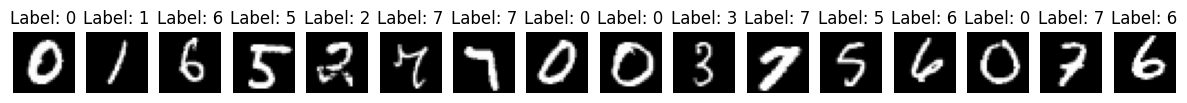

Test Accuracy: 11.32%


In [ ]:
# test using mnist dataset
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

mnist_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_test_dataset = datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=mnist_transform
)

mnist_test_loader = DataLoader(mnist_test_dataset, batch_size=16, shuffle=True)


def show_mnist_images(data_loader):
    data_iter = iter(data_loader)
    images, labels = next(data_iter)
    images = images.squeeze(1)

    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for idx, (img, label) in enumerate(zip(images, labels)):
        axes[idx].imshow(img.numpy(), cmap="gray")
        axes[idx].set_title(f"Label: {label.item()}")
        axes[idx].axis("off")
    plt.show()

show_mnist_images(mnist_test_loader)

model = DigitClassifier(num_classes=10)
model.load_state_dict(torch.load("digit_classifier.pth"))

test_model(model, mnist_test_loader)
